In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model, preprocessing

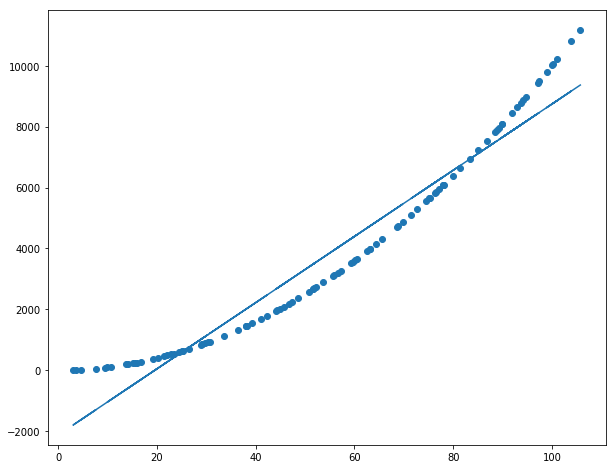

In [3]:
x = np.arange(100)+np.random.random(100)*10
y = x**2 + np.random.randn(100)*2
lr = linear_model.LinearRegression(normalize=True)
lr.fit(x.reshape(-1,1),y)
y_pred = lr.predict(x.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

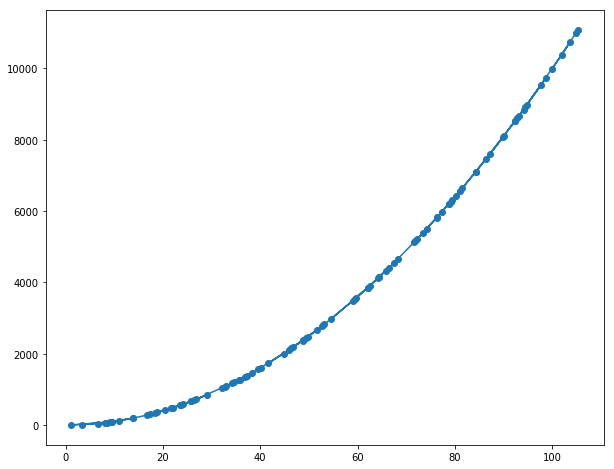

In [16]:
poly_f = preprocessing.PolynomialFeatures(degree=2)
x_poly = poly_f.fit_transform(x.reshape(-1,1))
lr = linear_model.LinearRegression(normalize=True)
lr.fit(x_poly,y.reshape(-1,1))
y_pred = lr.predict(x_poly)
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()


In [12]:
from sklearn.datasets import load_boston

In [14]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [18]:
X = df['LSTAT'].values.reshape(-1,1)
y = boston_data.target.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [22]:
lr = linear_model.LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_train_pred = lr.predict(train_X)

In [24]:
y_test_pred = lr.predict(test_X)

In [25]:
from sklearn.metrics import r2_score

In [27]:
r2_score(train_y,y_train_pred)

0.5677040507371613

In [28]:
r2_score(test_y,y_test_pred)

0.41738220524595127

In [29]:
lr.coef_

array([[-0.99178441]])

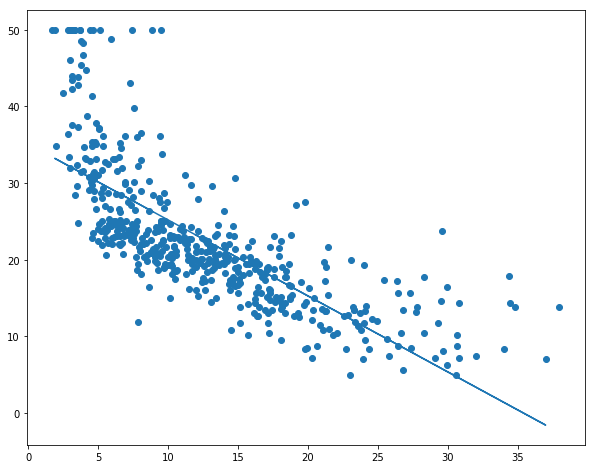

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(train_X,y_train_pred)
plt.show()

In [34]:
poly_f = preprocessing.PolynomialFeatures(degree=2)
X_train_adjusted = poly_f.fit_transform(train_X)
X_test_adjusted = poly_f.fit_transform(test_X)

In [40]:
lr = linear_model.LinearRegression()
lr.fit(X_train_adjusted,train_y)
y_train_pred = lr.predict(X_train_adjusted)
y_test_pred = lr.predict(X_test_adjusted)

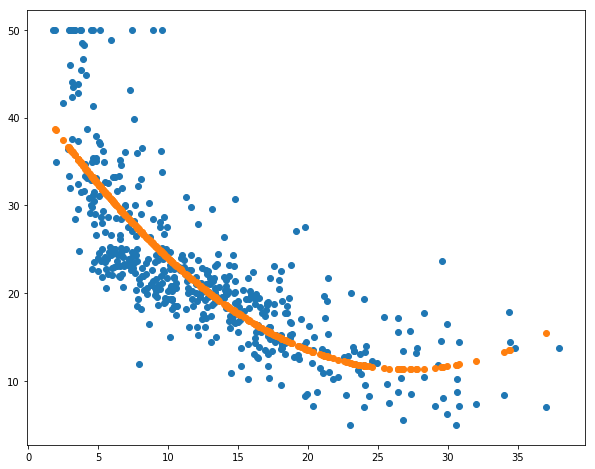

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.scatter(train_X,y_train_pred)
plt.show()

In [39]:
r2_score(train_y,y_train_pred), r2_score(test_y,y_test_pred)

(0.6509957523304547, 0.5861416651847671)

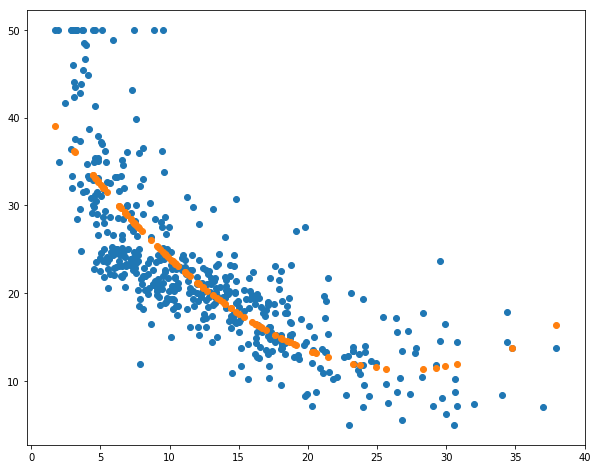

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.scatter(test_X,y_test_pred)
plt.show()

In [44]:
lr = linear_model.Ridge(alpha=1)
lr.fit(X_train_adjusted,train_y)
y_train_pred = lr.predict(X_train_adjusted)
y_test_pred = lr.predict(X_test_adjusted)

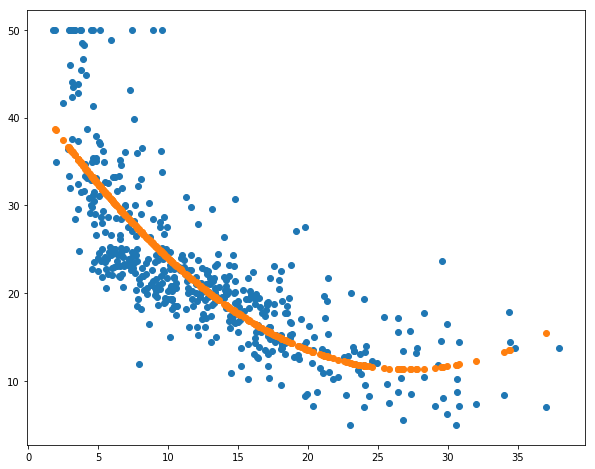

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.scatter(train_X,y_train_pred)
plt.show()